In [1]:
import sys
sys.path.insert(0, "/Users/aimachine/PyImage/utils")
import numpy as np
import os
import matplotlib.pyplot as plt
from glob import glob
from tifffile import imread

from Normalize import normalizeFloat, normalizeMinMax, Path, save_tiff_imagej_compatible

/Users/aimachine/anaconda3/envs/tensorflowpy3pt5/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/aimachine/anaconda3/envs/tensorflowpy3pt5/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:

X = sorted(glob('/Users/aimachine/Documents/JuliaData/Julia/LabKitLabelling/images/*.tif'))
Y = sorted(glob('/Users/aimachine/Documents/JuliaData/Julia/LabKitLabelling/masks/*.tif'))

targetdirX = '/Users/aimachine/Documents/JuliaData/Julia/LabKitLabelling/images/Ch0/'
targetdirY = '/Users/aimachine/Documents/JuliaData/Julia/LabKitLabelling/masks/Ch0/'

assert all(Path(x).name==Path(y).name for x,y in zip(X,Y))
Names = []

axes = 'XY'
print(os.path.split(X[0])[-1])


1.tif


In [3]:
listX = list(map(imread,X))
listY = list(map(imread,Y))

In [4]:

#Concactenate into an array

rankthreeX = np.zeros((len(listX), listX[0].shape[0], listX[0].shape[1]),dtype = float)
rankthreeY = np.zeros((len(listY), listY[0].shape[0], listY[0].shape[1]),dtype = int)

arraysX, arraysY = [listX[i] for i in range(len(listX))] , [listY[i] for i in range(len(listY))] 
   
  
rankfourX = np.stack(arraysX, axis = 0)
rankfourY = np.stack(arraysY, axis = 0)


rankfourX = rankfourX.reshape(rankfourX.shape[0], rankfourX.shape[2], rankfourX.shape[3], rankfourX.shape[1])
rankfourY = rankfourY.reshape(rankfourY.shape[0], rankfourY.shape[2], rankfourY.shape[3], rankfourY.shape[1])    
redthreeX = rankfourX[:,:,:,0] 
redthreeY = rankfourY[:,:,:,0]

redfourX = np.expand_dims(redthreeX, axis = -1)
redfourY = np.expand_dims(redthreeY, axis = -1)
print(rankfourX.shape, redfourX.shape)

(42, 512, 512, 2) (42, 512, 512, 1)


In [15]:
from keras.preprocessing.image import ImageDataGenerator

# traning data is augmented
train_datagen = ImageDataGenerator(
    rotation_range=20,
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0.5,
        zoom_range=(0.9, 1.1),
        horizontal_flip=False,
        vertical_flip=False, 
        fill_mode='constant',
        cval=0)




train_generatorX = train_datagen.flow(redfourX, batch_size= redfourX.shape[0], seed=1337)
train_generatorY=  train_datagen.flow(redfourY,  batch_size= redfourY.shape[0], seed=1337)
   



In [16]:
newX = train_generatorX.next()
newY = train_generatorY.next()
print(newX.shape)
print(newY.shape)



(42, 512, 512, 1)
(42, 512, 512, 1)


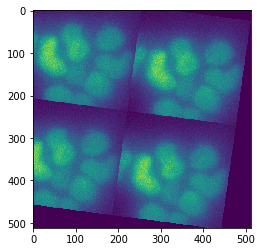

In [17]:
plt.figure
plt.imshow(newX[1,:,:,0])


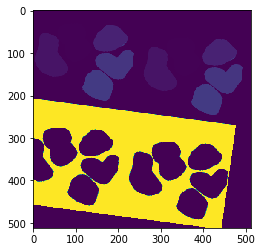

In [18]:
plt.figure
plt.imshow(newY[1,:,:,0])

In [19]:


for i in range(newX.shape[0]):
      resultX = newX[i,:,:,0]
       
      
      base = os.path.split(X[i])[-1]
      
      Filename = "new" + base
      
      save_tiff_imagej_compatible((targetdirX + Filename ) , resultX, axes)
        
for i in range(newY.shape[0]):
      resultY = newY[i,:,:,0]
      base = os.path.split(Y[i])[-1]

      Filename = "new" + base
     
      save_tiff_imagej_compatible((targetdirY + Filename ) , resultY, axes)        